In [2]:
import config

In [3]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [4]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [111]:
playlist = sp.user_playlist_tracks("spotify", "77CxoauZX3xv8VsfVwPJxT",market="GB")
playlist

{'href': 'https://api.spotify.com/v1/playlists/77CxoauZX3xv8VsfVwPJxT/tracks?offset=0&limit=100&market=GB&additional_types=track',
 'items': [{'added_at': '2019-01-26T12:01:30Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/eb6wy3bfciliqyypwe92l33iw'},
    'href': 'https://api.spotify.com/v1/users/eb6wy3bfciliqyypwe92l33iw',
    'id': 'eb6wy3bfciliqyypwe92l33iw',
    'type': 'user',
    'uri': 'spotify:user:eb6wy3bfciliqyypwe92l33iw'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7f5Zgnp2spUuuzKplmRkt7'},
       'href': 'https://api.spotify.com/v1/artists/7f5Zgnp2spUuuzKplmRkt7',
       'id': '7f5Zgnp2spUuuzKplmRkt7',
       'name': 'Lost Frequencies',
       'type': 'artist',
       'uri': 'spotify:artist:7f5Zgnp2spUuuzKplmRkt7'},
      {'external_urls': {'spotify': 'https://open.spotify.com/artist/2YYAp30sXeDAKiTLMfKGTT'},
  

In [112]:
print(list(playlist.keys())) 
print("Total number of songs in the playlist: ",playlist["total"]) 
len(playlist["items"]) 

['href', 'items', 'limit', 'next', 'offset', 'previous', 'total']
Total number of songs in the playlist:  1612


100

### Extracting the songs of a playlist

In [113]:
def get_playlist_tracks(username, playlist_id):
    playlist = sp.user_playlist_tracks(username, playlist_id, market="GB")
    tracks = playlist['items']
    while playlist['next']:
        playlist = sp.next(playlist)
        tracks.extend(playlist['items'])
    return tracks

In [114]:
playlist = (get_playlist_tracks("spotify", "77CxoauZX3xv8VsfVwPJxT"))


In [115]:
len(playlist)

1612

### Getting the Audio features

In [116]:
sp.audio_features(playlist[0]['track']['id'])

[{'danceability': 0.863,
  'energy': 0.588,
  'key': 1,
  'loudness': -7.141,
  'mode': 1,
  'speechiness': 0.0847,
  'acousticness': 0.142,
  'instrumentalness': 3.42e-05,
  'liveness': 0.457,
  'valence': 0.751,
  'tempo': 117.911,
  'type': 'audio_features',
  'id': '4sh506lJZac1T4o4NqtIuS',
  'uri': 'spotify:track:4sh506lJZac1T4o4NqtIuS',
  'track_href': 'https://api.spotify.com/v1/tracks/4sh506lJZac1T4o4NqtIuS',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4sh506lJZac1T4o4NqtIuS',
  'duration_ms': 190174,
  'time_signature': 4}]

In [117]:
list_of_songs=[]
for index in range(0,len(playlist)):
    list_of_songs.append((playlist[index]['track']["id"]))


In [118]:
list_of_songs

['4sh506lJZac1T4o4NqtIuS',
 '575NJxNUVDqwJGdzBrlLbv',
 '5fHNot2sHBsTUMqaGQlksX',
 '4c2W3VKsOFoIg2SFaO6DY5',
 '7vu0JkJh0ldukEYbTVcqd0',
 '0afhq8XCExXpqazXczTSve',
 '5HwnezK198pJCEj1l2Adjy',
 '1j4kHkkpqZRBwE0A4CN4Yv',
 '7dt6x5M1jzdTEt8oCbisTK',
 '7vGuf3Y35N4wmASOKLUVVU',
 '5sIx4BlfYGuZeSLF40N9GH',
 '3nc420PXjTdBV5TN0gCFkS',
 '0Ult84lvFuqNvbyXwyRQ58',
 '4hQ6UGyWQIGJmHSo0J88JW',
 '7BKLCZ1jbUBVqRi2FVlTVw',
 '3EPXxR3ImUwfayaurPi3cm',
 '0pqnGHJpmpxLKifKRmU6WP',
 '14sOS5L36385FJ3OL8hew4',
 '5N4erncE7kuUccm7zEmwzk',
 '2FY7b99s15jUprqC0M5NCT',
 '2VxeLyX666F8uXCJ0dZF8B',
 '1rqqCSm0Qe4I9rUvWncaom',
 '0YammaEkYSeo9vQYZ1OwS6',
 '5k38wzpLb15YgncyWdTZE4',
 '6ATgDc6e4sPn84hvJsAmPt',
 '1ArLnG0bHaHPXqf08sEKM0',
 '7M9t7BCy51ITF8IMyiemzk',
 '3uGJfbP8pV3zTIH6Vi8G8x',
 '45FrYVS9BScbfO8lujdsW0',
 '4T6FWA703h6H7zk1FoSARw',
 '55n9yjI6qqXh5F2mYvUc2y',
 '1ilQWV30hUZjBaupGUsaqK',
 '5wrDrajYZSJqta7rJBvcJV',
 '7bMkcxifc4EjIQKw49EC7h',
 '4gVZhkcsZcwQ4mU1gEeXEO',
 '07uuo1yEND3oinbFZnYOvx',
 '2P91MQbaiQOfbiz9VqhqKQ',
 

In [119]:
list_audio_features= []
for i in list_of_songs:
    feat = sp.audio_features(i)
    list_audio_features.append(feat[0])

In [120]:
list_audio_features

[{'danceability': 0.863,
  'energy': 0.588,
  'key': 1,
  'loudness': -7.141,
  'mode': 1,
  'speechiness': 0.0847,
  'acousticness': 0.142,
  'instrumentalness': 3.42e-05,
  'liveness': 0.457,
  'valence': 0.751,
  'tempo': 117.911,
  'type': 'audio_features',
  'id': '4sh506lJZac1T4o4NqtIuS',
  'uri': 'spotify:track:4sh506lJZac1T4o4NqtIuS',
  'track_href': 'https://api.spotify.com/v1/tracks/4sh506lJZac1T4o4NqtIuS',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4sh506lJZac1T4o4NqtIuS',
  'duration_ms': 190174,
  'time_signature': 4},
 {'danceability': 0.706,
  'energy': 0.855,
  'key': 10,
  'loudness': -5.377,
  'mode': 1,
  'speechiness': 0.215,
  'acousticness': 0.0911,
  'instrumentalness': 0,
  'liveness': 0.347,
  'valence': 0.293,
  'tempo': 107.184,
  'type': 'audio_features',
  'id': '575NJxNUVDqwJGdzBrlLbv',
  'uri': 'spotify:track:575NJxNUVDqwJGdzBrlLbv',
  'track_href': 'https://api.spotify.com/v1/tracks/575NJxNUVDqwJGdzBrlLbv',
  'analysis_url': 'https://ap

In [121]:
playlist = pd.json_normalize(list_audio_features)

In [122]:
playlist

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.863,0.588,1,-7.141,1,0.0847,0.14200,0.000034,0.4570,0.751,117.911,audio_features,4sh506lJZac1T4o4NqtIuS,spotify:track:4sh506lJZac1T4o4NqtIuS,https://api.spotify.com/v1/tracks/4sh506lJZac1...,https://api.spotify.com/v1/audio-analysis/4sh5...,190174,4
1,0.706,0.855,10,-5.377,1,0.2150,0.09110,0.000000,0.3470,0.293,107.184,audio_features,575NJxNUVDqwJGdzBrlLbv,spotify:track:575NJxNUVDqwJGdzBrlLbv,https://api.spotify.com/v1/tracks/575NJxNUVDqw...,https://api.spotify.com/v1/audio-analysis/575N...,201253,4
2,0.836,0.552,7,-5.660,1,0.0851,0.04330,0.000000,0.0773,0.525,97.036,audio_features,5fHNot2sHBsTUMqaGQlksX,spotify:track:5fHNot2sHBsTUMqaGQlksX,https://api.spotify.com/v1/tracks/5fHNot2sHBsT...,https://api.spotify.com/v1/audio-analysis/5fHN...,218173,4
3,0.855,0.624,1,-4.093,1,0.0488,0.15800,0.000000,0.0513,0.962,117.959,audio_features,4c2W3VKsOFoIg2SFaO6DY5,spotify:track:4c2W3VKsOFoIg2SFaO6DY5,https://api.spotify.com/v1/tracks/4c2W3VKsOFoI...,https://api.spotify.com/v1/audio-analysis/4c2W...,180757,4
4,0.728,0.415,8,-6.852,1,0.0639,0.40100,0.000000,0.0616,0.455,114.145,audio_features,7vu0JkJh0ldukEYbTVcqd0,spotify:track:7vu0JkJh0ldukEYbTVcqd0,https://api.spotify.com/v1/tracks/7vu0JkJh0ldu...,https://api.spotify.com/v1/audio-analysis/7vu0...,176320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,0.756,0.697,8,-6.377,1,0.0401,0.18200,0.000000,0.3330,0.956,94.996,audio_features,0QBzMgT7NIeoCYy3sJCof1,spotify:track:0QBzMgT7NIeoCYy3sJCof1,https://api.spotify.com/v1/tracks/0QBzMgT7NIeo...,https://api.spotify.com/v1/audio-analysis/0QBz...,206071,4
1608,0.662,0.807,10,-3.285,1,0.0411,0.29300,0.000004,0.1890,0.772,103.031,audio_features,5iFQfP3AqVnHHS89LKQisL,spotify:track:5iFQfP3AqVnHHS89LKQisL,https://api.spotify.com/v1/tracks/5iFQfP3AqVnH...,https://api.spotify.com/v1/audio-analysis/5iFQ...,187682,4
1609,0.763,0.782,7,-4.541,0,0.0346,0.18200,0.000007,0.2930,0.502,127.034,audio_features,3sa06xVNmLLYIxdNNmVQN8,spotify:track:3sa06xVNmLLYIxdNNmVQN8,https://api.spotify.com/v1/tracks/3sa06xVNmLLY...,https://api.spotify.com/v1/audio-analysis/3sa0...,177689,4
1610,0.539,0.708,5,-6.189,1,0.0976,0.01290,0.000000,0.1400,0.381,123.039,audio_features,0JpEMzTHbt2zBIXrntrXzG,spotify:track:0JpEMzTHbt2zBIXrntrXzG,https://api.spotify.com/v1/tracks/0JpEMzTHbt2z...,https://api.spotify.com/v1/audio-analysis/0JpE...,186141,4


In [123]:
playlist.to_csv("playlisy_1612.csv", index = True)

In [124]:
### Importing csv
playlist = pd.read_csv("playlisy_1612.csv",index_col = 0)
playlist

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.863,0.588,1,-7.141,1,0.0847,0.14200,0.000034,0.4570,0.751,117.911,audio_features,4sh506lJZac1T4o4NqtIuS,spotify:track:4sh506lJZac1T4o4NqtIuS,https://api.spotify.com/v1/tracks/4sh506lJZac1...,https://api.spotify.com/v1/audio-analysis/4sh5...,190174,4
1,0.706,0.855,10,-5.377,1,0.2150,0.09110,0.000000,0.3470,0.293,107.184,audio_features,575NJxNUVDqwJGdzBrlLbv,spotify:track:575NJxNUVDqwJGdzBrlLbv,https://api.spotify.com/v1/tracks/575NJxNUVDqw...,https://api.spotify.com/v1/audio-analysis/575N...,201253,4
2,0.836,0.552,7,-5.660,1,0.0851,0.04330,0.000000,0.0773,0.525,97.036,audio_features,5fHNot2sHBsTUMqaGQlksX,spotify:track:5fHNot2sHBsTUMqaGQlksX,https://api.spotify.com/v1/tracks/5fHNot2sHBsT...,https://api.spotify.com/v1/audio-analysis/5fHN...,218173,4
3,0.855,0.624,1,-4.093,1,0.0488,0.15800,0.000000,0.0513,0.962,117.959,audio_features,4c2W3VKsOFoIg2SFaO6DY5,spotify:track:4c2W3VKsOFoIg2SFaO6DY5,https://api.spotify.com/v1/tracks/4c2W3VKsOFoI...,https://api.spotify.com/v1/audio-analysis/4c2W...,180757,4
4,0.728,0.415,8,-6.852,1,0.0639,0.40100,0.000000,0.0616,0.455,114.145,audio_features,7vu0JkJh0ldukEYbTVcqd0,spotify:track:7vu0JkJh0ldukEYbTVcqd0,https://api.spotify.com/v1/tracks/7vu0JkJh0ldu...,https://api.spotify.com/v1/audio-analysis/7vu0...,176320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,0.756,0.697,8,-6.377,1,0.0401,0.18200,0.000000,0.3330,0.956,94.996,audio_features,0QBzMgT7NIeoCYy3sJCof1,spotify:track:0QBzMgT7NIeoCYy3sJCof1,https://api.spotify.com/v1/tracks/0QBzMgT7NIeo...,https://api.spotify.com/v1/audio-analysis/0QBz...,206071,4
1608,0.662,0.807,10,-3.285,1,0.0411,0.29300,0.000004,0.1890,0.772,103.031,audio_features,5iFQfP3AqVnHHS89LKQisL,spotify:track:5iFQfP3AqVnHHS89LKQisL,https://api.spotify.com/v1/tracks/5iFQfP3AqVnH...,https://api.spotify.com/v1/audio-analysis/5iFQ...,187682,4
1609,0.763,0.782,7,-4.541,0,0.0346,0.18200,0.000007,0.2930,0.502,127.034,audio_features,3sa06xVNmLLYIxdNNmVQN8,spotify:track:3sa06xVNmLLYIxdNNmVQN8,https://api.spotify.com/v1/tracks/3sa06xVNmLLY...,https://api.spotify.com/v1/audio-analysis/3sa0...,177689,4
1610,0.539,0.708,5,-6.189,1,0.0976,0.01290,0.000000,0.1400,0.381,123.039,audio_features,0JpEMzTHbt2zBIXrntrXzG,spotify:track:0JpEMzTHbt2zBIXrntrXzG,https://api.spotify.com/v1/tracks/0JpEMzTHbt2z...,https://api.spotify.com/v1/audio-analysis/0JpE...,186141,4


In [96]:
def analyze_playlist(creator, playlist_id):
    playlist_features_list = ["artist", "album", "track_name","track_id", "danceability", "energy", "key", "loudness", "mode", "speechiness",
                              "acousticness", "instrumentalness", "liveness", "valence", "tempo", 
                              "duration_ms", "time_signature"]
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    

    # Create empty dict
    playlist_features = {}
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    playlist = get_playlist_tracks(creator, playlist_id)
    for track in playlist:
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
    
    # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
            
      # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
    return playlist_df


In [97]:
a = analyze_playlist('spotify','37i9dQZF1DWWEJlAGA9gs0' )
a

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Johann Sebastian Bach,"Bach: Cello Suites Nos. 1, 5 & 6","Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",17i5jLpzndlQhbS4SrTd0B,0.275,0.157,7,-18.752,1,0.0636,0.89,0.842,0.186,0.304,73.289,152280,4
1,Lang Lang,Piano Book (Deluxe Edition),"The Well-Tempered Clavier: Book 1, BWV 846-869...",4SFBV7SRNG2e2kyL1F6kjU,0.221,0.126,0,-25.427,1,0.0447,0.989,0.897,0.102,0.216,133.63,139307,4
2,Ludwig van Beethoven,"Für Elise, Bagatelle No. 25 in A Minor, WoO 59","Bagatelle No. 25 in A Minor, WoO 59 ""Für Elise""",3zLTPuucd3e6TxZnu2dlVS,0.289,0.0306,9,-30.79,0,0.0446,0.987,0.911,0.102,0.118,125.61,212067,3
3,Berliner Philharmoniker,Albinoni: Adagio in G minor / Pachelbel: Canon,"Suite No. 3 in D Major, BWV 1068: II. Air",7h6GoPvGHC9uzZJ8bNvfIq,0.0753,0.07,2,-27.272,1,0.044,0.918,0.947,0.146,0.0625,79.801,365147,4
4,Sir Neville Marriner,Mozart: Academy in Concert,Pachelbel: Canon and Gigue for Three Violins a...,7B4HbpZCSfLzKGapKzlUPD,0.128,0.132,2,-17.67,1,0.0353,0.744,0.942,0.107,0.0988,85.314,301587,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Jerusalem Quartet,Smetana & Janáček: String Quartets,String Quartet No. 1 'Kreutzer Sonata': String...,5UUNrbwbYIkNshq22NNKrX,0.194,0.101,11,-21.772,1,0.048,0.931,0.714,0.221,0.074,91.74,266733,3
144,Amy Beach,"Beach: Variations on Balkan Themes Op. 60, Mar...","Young Birches, Op. 128, No. 2",4VVEfBXep7FdOt524jkfLF,0.24,0.0834,6,-29.545,0,0.0499,0.978,0.944,0.0804,0.188,169.621,159320,4
145,Anne-Sophie Mutter,Tchaikovsky / Korngold: Violin Concertos,"Violin Concerto in D Major, Op. 35, TH. 59: II...",7hOLwSaTSkrqxSMzj4bXI1,0.405,0.318,9,-17.14,1,0.0565,0.938,0.723,0.284,0.342,151.434,424653,4
146,Dmitri Shostakovich,Shostakovich: Jazz Suites Nos. 1 - 2 / The Bol...,"Tahiti Trot, Op. 16 (orchestral transcription ...",76i4IBw3KsuDw783tvHB0e,0.291,0.0981,8,-23.156,1,0.0398,0.95,0.865,0.275,0.194,138.168,249640,4


In [98]:

a = a.drop(a.columns[[0, 1, 2, 3]], axis=1) 
a

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.275,0.157,7,-18.752,1,0.0636,0.89,0.842,0.186,0.304,73.289,152280,4
1,0.221,0.126,0,-25.427,1,0.0447,0.989,0.897,0.102,0.216,133.63,139307,4
2,0.289,0.0306,9,-30.79,0,0.0446,0.987,0.911,0.102,0.118,125.61,212067,3
3,0.0753,0.07,2,-27.272,1,0.044,0.918,0.947,0.146,0.0625,79.801,365147,4
4,0.128,0.132,2,-17.67,1,0.0353,0.744,0.942,0.107,0.0988,85.314,301587,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.194,0.101,11,-21.772,1,0.048,0.931,0.714,0.221,0.074,91.74,266733,3
144,0.24,0.0834,6,-29.545,0,0.0499,0.978,0.944,0.0804,0.188,169.621,159320,4
145,0.405,0.318,9,-17.14,1,0.0565,0.938,0.723,0.284,0.342,151.434,424653,4
146,0.291,0.0981,8,-23.156,1,0.0398,0.95,0.865,0.275,0.194,138.168,249640,4


In [99]:
scaler = StandardScaler()
scaler.fit(a)
a_scaled = scaler.transform(a)
a_scaled_df = pd.DataFrame(a_scaled, columns = a.columns)
display(a.head())
print()
display(a_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.275,0.157,7,-18.752,1,0.0636,0.89,0.842,0.186,0.304,73.289,152280,4
1,0.221,0.126,0,-25.427,1,0.0447,0.989,0.897,0.102,0.216,133.63,139307,4
2,0.289,0.0306,9,-30.79,0,0.0446,0.987,0.911,0.102,0.118,125.61,212067,3
3,0.0753,0.07,2,-27.272,1,0.044,0.918,0.947,0.146,0.0625,79.801,365147,4
4,0.128,0.132,2,-17.67,1,0.0353,0.744,0.942,0.107,0.0988,85.314,301587,4


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.183861,0.615272,0.498515,0.716865,0.703526,1.049507,-0.269606,0.394655,0.931857,0.901059,-0.927260,-1.016657,0.545725
1,-0.220347,0.261268,-1.534797,-0.352412,0.703526,0.004818,0.587658,0.600509,-0.276383,0.380638,1.030139,-1.071155,0.545725
2,0.288656,-0.828150,1.079461,-1.211518,-1.421411,-0.000710,0.570339,0.652908,-0.276383,-0.198922,0.769979,-0.765502,-0.800397
3,-1.310960,-0.378222,-0.953851,-0.647965,0.703526,-0.033874,-0.027148,0.787648,0.356505,-0.527142,-0.716018,-0.122438,0.545725
4,-0.916483,0.329785,-0.953851,0.890192,0.703526,-0.514763,-1.533855,0.768934,-0.204464,-0.312469,-0.537182,-0.389443,0.545725


In [100]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(a_scaled_df)

KMeans(n_clusters=3, random_state=1234)

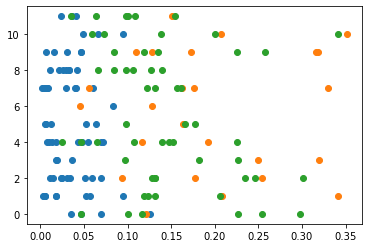

In [102]:
# assign a cluster to each example
labels = kmeans.predict(a_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(a.to_numpy()[row_ix, 1], a.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

In [103]:
clusters = kmeans.predict(a_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    67
1    25
2    56
dtype: int64

In [104]:
a["cluster"] = clusters
a

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.275,0.157,7,-18.752,1,0.0636,0.89,0.842,0.186,0.304,73.289,152280,4,2
1,0.221,0.126,0,-25.427,1,0.0447,0.989,0.897,0.102,0.216,133.63,139307,4,0
2,0.289,0.0306,9,-30.79,0,0.0446,0.987,0.911,0.102,0.118,125.61,212067,3,0
3,0.0753,0.07,2,-27.272,1,0.044,0.918,0.947,0.146,0.0625,79.801,365147,4,0
4,0.128,0.132,2,-17.67,1,0.0353,0.744,0.942,0.107,0.0988,85.314,301587,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.194,0.101,11,-21.772,1,0.048,0.931,0.714,0.221,0.074,91.74,266733,3,2
144,0.24,0.0834,6,-29.545,0,0.0499,0.978,0.944,0.0804,0.188,169.621,159320,4,0
145,0.405,0.318,9,-17.14,1,0.0565,0.938,0.723,0.284,0.342,151.434,424653,4,1
146,0.291,0.0981,8,-23.156,1,0.0398,0.95,0.865,0.275,0.194,138.168,249640,4,2


In [105]:
kmeans2 = KMeans(n_clusters=50,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(a_scaled_df)
print(kmeans2.inertia_)

312.3217379126072


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

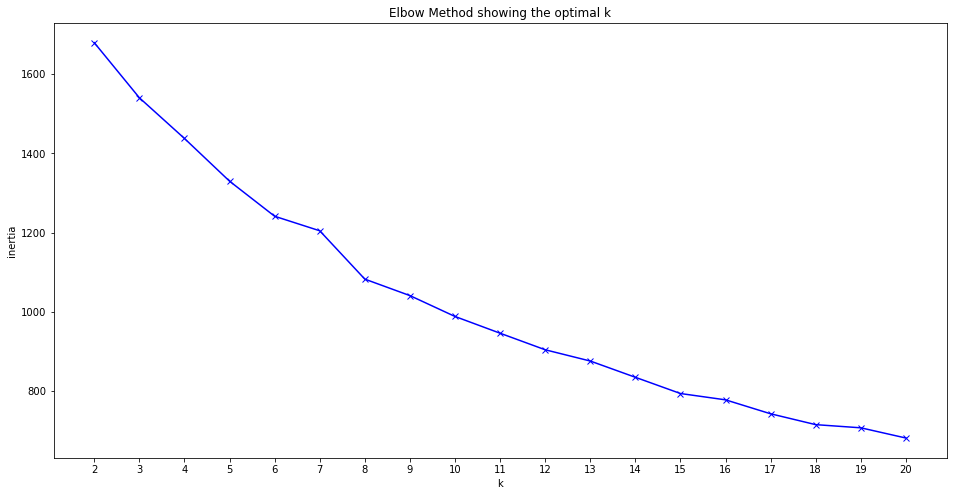

In [106]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(a_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')